# Exploratory Data Analysis

In this step of the project I'll be diving into the data to see if I can spot trends and correlations. There will be visualizations here as well as in a tableau dashboard

In [1]:
# Import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Import Data

df = pd.read_csv(r'C:\Users\bronc\Downloads\Capstone 3\sales_data_sample(clean).csv')

In [3]:
df.head()

,Unnamed: 0,Order_Number,Quantity_Ordered,Price_Each,Order_Line_Number,Sales,Order_Date,Status,QTR_ID,Month_ID,Year_ID,Product_Line,MSRP,Product_Code,Customer_Name,City,Country,Deal_Size
0,0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,4,10159,49,106.23,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium


Next I'll drop the Unnamed column that the import step added

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Order_Number,Quantity_Ordered,Price_Each,Order_Line_Number,Sales,Order_Date,Status,QTR_ID,Month_ID,Year_ID,Product_Line,MSRP,Product_Code,Customer_Name,City,Country,Deal_Size
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,10159,49,106.23,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium


Now that the data is imported properly I'll look at some summary statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Number       2617 non-null   int64  
 1   Quantity_Ordered   2617 non-null   int64  
 2   Price_Each         2617 non-null   float64
 3   Order_Line_Number  2617 non-null   int64  
 4   Sales              2617 non-null   float64
 5   Order_Date         2617 non-null   object 
 6   Status             2617 non-null   object 
 7   QTR_ID             2617 non-null   int64  
 8   Month_ID           2617 non-null   int64  
 9   Year_ID            2617 non-null   int64  
 10  Product_Line       2617 non-null   object 
 11  MSRP               2617 non-null   int64  
 12  Product_Code       2617 non-null   object 
 13  Customer_Name      2617 non-null   object 
 14  City               2617 non-null   object 
 15  Country            2617 non-null   object 
 16  Deal_Size          2617 

Order_Date needs to be a datetime object so I'll fix that right now

In [6]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors = 'coerce')

In [7]:
# Verify the change and that no new nulls were generated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order_Number       2617 non-null   int64         
 1   Quantity_Ordered   2617 non-null   int64         
 2   Price_Each         2617 non-null   float64       
 3   Order_Line_Number  2617 non-null   int64         
 4   Sales              2617 non-null   float64       
 5   Order_Date         2617 non-null   datetime64[ns]
 6   Status             2617 non-null   object        
 7   QTR_ID             2617 non-null   int64         
 8   Month_ID           2617 non-null   int64         
 9   Year_ID            2617 non-null   int64         
 10  Product_Line       2617 non-null   object        
 11  MSRP               2617 non-null   int64         
 12  Product_Code       2617 non-null   object        
 13  Customer_Name      2617 non-null   object        
 14  City    

In [8]:
df.describe()

,Order_Number,Quantity_Ordered,Price_Each,Order_Line_Number,Sales,QTR_ID,Month_ID,Year_ID,MSRP
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000
mean,10252.286970,34.926634,101.601111,6.453955,3550.439847,2.756974,7.211693,2003.762323,101.067635
std,89.197311,9.363944,42.548092,4.225247,1823.519150,1.214942,3.701946,0.672234,40.518463
min,10100.000000,6.000000,27.220000,1.000000,553.950000,1.000000,1.000000,2003.000000,33.000000
25%,10176.000000,27.000000,68.710000,3.000000,2204.100000,2.000000,4.000000,2003.000000,68.000000
50%,10255.000000,34.000000,96.230000,6.000000,3183.290000,3.000000,8.000000,2004.000000,99.000000
75%,10326.000000,43.000000,127.980000,9.000000,4498.190000,4.000000,11.000000,2004.000000,127.000000
max,10419.000000,97.000000,252.870000,18.000000,12536.500000,4.000000,12.000000,2005.000000,214.000000


### Data Visualizations

Nothing here looks out of the ordinary. Now I'll dive into some visualizations

<AxesSubplot:>

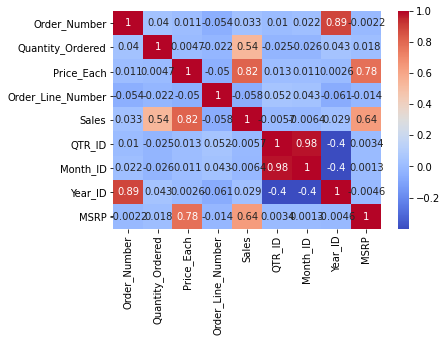

In [9]:
# Check for correlations on a heatmap

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

For our variable of interest, sales, the strongest correlations aren't too surprising being Price_Each, MSRP and Quantity_Ordered. This is good to see as it makes sense. For our model we will also be making dummy variablesfor the individual Product Lines and Codes so these will also be included at that point

The rest of the visualizations are done in Tableau and can be viewed here:

https://public.tableau.com/profile/roman.quijano#!/vizhome/Capstone3TableauVisualizations/SalesareHighestinQ4andParticularlyinNovember

From these visualizations I learned more about the data and which variables will be worth inspecting in models. Also, since the 2005 data ends in May I will be treating the next quarter as June, July and August. While this isn't conventional practice it is possible that a company might use it especially since this company sees a very high percentage of its sales in November